# fbprophet 을 사용한 지수예측

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [48]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
# import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [123]:
df_kospi = fdr.DataReader('KS11','2016-01-04','2022-06-30')
df_kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,1918.76,1954.47,1954.52,1918.76,359020000.0,-0.0217
2016-01-05,1930.53,1911.93,1937.57,1911.93,446550000.0,0.0061
2016-01-06,1925.43,1934.25,1934.25,1911.61,594610000.0,-0.0026
2016-01-07,1904.33,1915.71,1926.41,1901.24,393040000.0,-0.0110
2016-01-08,1917.62,1889.42,1918.25,1883.82,430200000.0,0.0070
...,...,...,...,...,...,...
2022-06-24,2366.60,2327.11,2373.48,2319.99,654440000.0,0.0226
2022-06-27,2401.92,2383.20,2418.94,2365.86,510590000.0,0.0149
2022-06-28,2422.09,2405.20,2422.10,2393.96,564990000.0,0.0084


<AxesSubplot:xlabel='Date'>

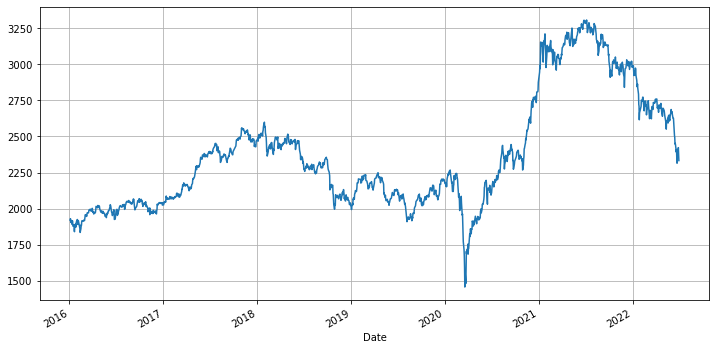

In [124]:
 df_kospi['Close'].plot(figsize=(12,6),grid=True)

## 훈련,테스트용 데이터

In [126]:
df_train = df_kospi.loc[:'2022-03-31']

In [127]:
df_test = df_kospi.loc['2022-04-01':'2022-06-30']

In [128]:
train = pd.DataFrame({'ds': df_train.index, 'y': df_train['Close']})
train.reset_index(inplace = True)
del train['Date']

In [129]:
test = pd.DataFrame({'ds': df_test.index, 'y': df_test['Close']})
test.reset_index(inplace = True)
del test['Date']

## 데이터 특성 반영된 prophet객체 만들기

In [130]:
prophet = Prophet(daily_seasonality = 'auto',
           weekly_seasonality=False,
           yearly_seasonality=False,
           changepoint_range=1,
           changepoint_prior_scale=0.05)

In [131]:
prophet.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [132]:
len(test)

62

In [133]:
train

,ds,y
0,2016-01-04,1918.76
1,2016-01-05,1930.53
2,2016-01-06,1925.43
3,2016-01-07,1904.33
4,2016-01-08,1917.62
...,...,...
1529,2022-03-25,2729.98
1530,2022-03-28,2729.56
1531,2022-03-29,2741.07
1532,2022-03-30,2746.74


In [134]:
test

,ds,y
0,2022-04-01,2739.85
1,2022-04-04,2757.90
2,2022-04-05,2759.20
3,2022-04-06,2735.03
4,2022-04-07,2695.86
...,...,...
57,2022-06-24,2366.60
58,2022-06-27,2401.92
59,2022-06-28,2422.09
60,2022-06-29,2377.99


## test 기간(62일)의 데이터를 예측

In [135]:
future = prophet.make_future_dataframe(periods = len(test), freq='D')
future[-62:]

,ds
1534,2022-04-01
1535,2022-04-02
1536,2022-04-03
1537,2022-04-04
1538,2022-04-05
...,...
1591,2022-05-28
1592,2022-05-29
1593,2022-05-30
1594,2022-05-31


In [136]:
# 예측된 결과
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-04,1921.810378,1826.399334,2016.476130
1,2016-01-05,1922.191077,1823.097400,2011.502367
2,2016-01-06,1922.571776,1829.696386,2013.804767
3,2016-01-07,1922.952475,1827.656511,2016.339167
4,2016-01-08,1923.333173,1826.952637,2012.071570
...,...,...,...,...
1591,2022-05-28,2557.606930,2463.535206,2650.653582
1592,2022-05-29,2555.414391,2459.985470,2661.418936
1593,2022-05-30,2553.221851,2450.004752,2661.543692
1594,2022-05-31,2551.029312,2444.897813,2655.651645


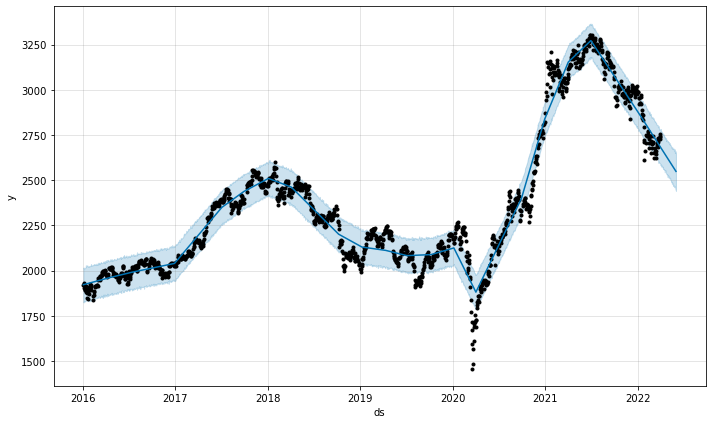

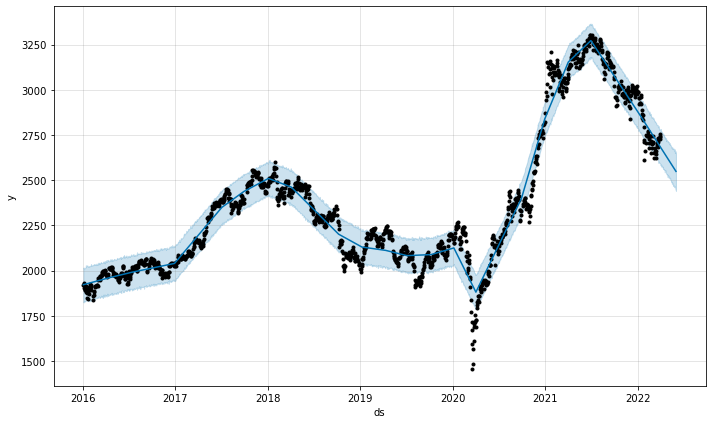

In [137]:
prophet.plot(forecast)

In [173]:
df_kospi.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2022-06-17', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='Date', length=1596, freq=None)

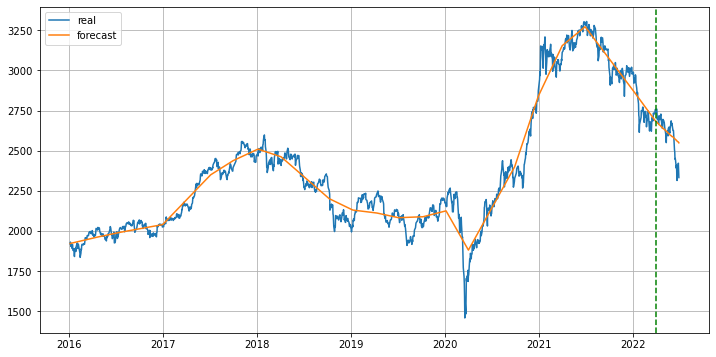

In [188]:
plt.figure(figsize = (12, 6))

plt.plot(df_kospi.index, df_kospi['Close'], label = 'real')
plt.plot(df_kospi.index, forecast['yhat'], label = 'forecast')
plt.axvline(pd.to_datetime('2022-04-01'),color='green',linestyle='--')
plt.grid()
plt.legend()

## mse구하기

In [149]:
def get_mse(y, y_hat):
    return np.sqrt(np.mean((y - y_hat) ** 2))

In [158]:
real = df_kospi['Close'][-62:].values
real

array([2739.85, 2757.9 , 2759.2 , 2735.03, 2695.86, 2700.39, 2693.1 ,
       2666.76, 2716.49, 2716.71, 2696.06, 2693.21, 2718.89, 2718.69,
       2728.21, 2704.71, 2657.13, 2668.31, 2639.06, 2667.49, 2695.05,
       2687.45, 2680.46, 2677.57, 2644.51, 2610.81, 2596.56, 2592.27,
       2550.08, 2604.24, 2596.58, 2620.44, 2625.98, 2592.34, 2639.29,
       2647.38, 2605.87, 2617.22, 2612.45, 2638.05, 2669.66, 2685.9 ,
       2658.99, 2670.65, 2626.34, 2626.15, 2625.44, 2595.87, 2504.51,
       2492.97, 2447.38, 2451.41, 2440.93, 2391.03, 2408.93, 2342.81,
       2314.32, 2366.6 , 2401.92, 2422.09, 2377.99, 2332.64])

In [159]:
# 예측값
y_hat = forecast['yhat'][-62:].values
y_hat

array([2682.58167545, 2680.38913606, 2678.19659666, 2676.00405727,
       2673.81151788, 2671.61897848, 2669.42643909, 2667.2338997 ,
       2665.0413603 , 2662.84882091, 2660.65628152, 2658.46374212,
       2656.27120273, 2654.07866334, 2651.88612394, 2649.69358455,
       2647.50104516, 2645.30850576, 2643.11596637, 2640.92342698,
       2638.73088758, 2636.53834819, 2634.3458088 , 2632.1532694 ,
       2629.96073001, 2627.76819062, 2625.57565122, 2623.38311183,
       2621.19057244, 2618.99803304, 2616.80549365, 2614.61295426,
       2612.42041486, 2610.22787547, 2608.03533608, 2605.84279668,
       2603.65025729, 2601.4577179 , 2599.2651785 , 2597.07263911,
       2594.88009972, 2592.68756032, 2590.49502093, 2588.30248154,
       2586.10994214, 2583.91740275, 2581.72486336, 2579.53232396,
       2577.33978457, 2575.14724518, 2572.95470578, 2570.76216639,
       2568.569627  , 2566.3770876 , 2564.18454821, 2561.99200882,
       2559.79946942, 2557.60693003, 2555.41439064, 2553.22185

In [161]:
# 예측결과 
mse = get_mse(real, y_hat)
mse

87.76543019375093

## 실제값과 차이 시각화

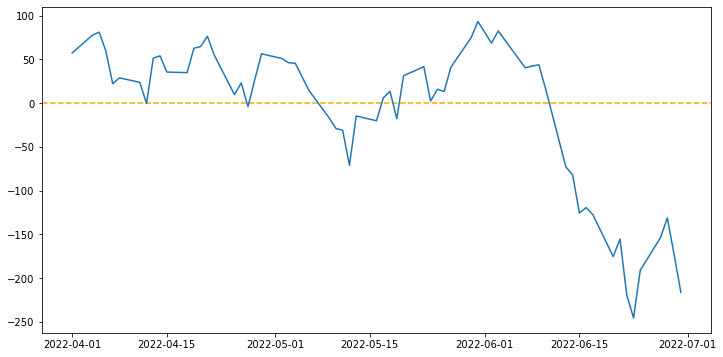

In [180]:
dif = real - y_hat
plt.figure(figsize=(12,6))
plt.axhline(0,color='orange',linestyle='--')
plt.plot(df_kospi['Close'][-62:].index, dif)